# Repaso (Módulo 3)
> Recordar que el tema principal del módulo son las ecuaciones diferenciales. Entonces, al finalizar este módulo, las competencias principales que deben tener ustedes es
> - Resolver de forma numérica ecuaciones diferenciales ordinarias (EDO) de cualquier orden.
> - Graficar soluciones de dichas EDO en diferentes representaciones.
> - Interpretar o concluir acerca de las gráficas que se obtuvieron.

___
## Ejemplo 1. Conejos vs. Ovejas.

Imaginemos que en un mismo ecosistema se encuentran conejos y ovejas. Supongamos, además, que ambas compiten por el mismo alimento (hierba) y que la cantidad total de alimento es limitada. Se ignoran otros factores como depredadores, efectos de temporada (estaciones), y otras fuentes de comida. El modelo de competición entre dos especies **Lotka-Volterra** nos sirve para describir este fenómeno.

Dos fenómenos importantes:
- Cada especie crecería hasta su capacidad máxima en ausencia de la otra especie. Esto se puede modelar con la ecuación logística para cada especie. Los conejos tienen una habilidad soprendente para reproducirse, entonces comparativamente deberían crecer más.
- Cuando conejos y ovejas se encuentran, empieza la competencia. Algunas veces los conejos comen, pero las ovejas (al ser más grandes) ganarán el derecho a la comida la mayoría de las veces. Supondremos que dichos conflictos se dan a una tasa proporcional al tamaño de cada población (si hay dos veces más ovejas, la probabilidad de que un conejo encuentre a una oveja será el doble). Supondremos que dicha competencia disminuirá la tasa de crecimiento para cada especie, y el efecto será mayor para los conejos.

Con las consideraciones anteriores, un modelo específico es:

\begin{align}
\frac{dx_1}{dt} &= x_1(3-x_1-2x_2)\\
\frac{dx_2}{dt} &= x_2(2-x_2-x_1),
\end{align}

donde $x_1(t)\geq 0$ es la población de conejos al instante $t$ y $x_2(t)\geq 0$ es la población de ovejas al instante $t$. Definimos $x=\left[x_1\quad x_2\right]^T$.

Esta selección de coeficientes se tiene para recrear el escenario descrito. Sin embargo, este modelo se puede utilizar para estudiar competición entre especies en general y los coeficientes cambiarán en cada caso.

Simule el sistema para cada una de las siguientes condiciones iniciales. Para cada caso, obtenga gráficas de $x_1$ vs. $t$, $x_2$ vs. $t$ y $x_2$ vs. $x_1$. ¿Qué pasa con las poblaciones de conejos y de ovejas cuando $t\to\infty$? ¿Pueden coexistir?

1. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [0.5 \quad 1]^T$.
2. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 0.5]^T$.
3. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1.5 \quad 1]^T$.
4. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 1.5]^T$.
5. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 1]^T$.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd 
from scipy.integrate import solve_ivp, odeint

In [7]:
x_01 = [0.5,1]
x_02 = [1,0.5]
x_03 = [1.5,1]
x_04 = [1,1.5]
x_05 = [1,1]
def f(x_2,x_1,r):
    return (x_1)*(3-x_1-2*x_2)
tspan= [0.5, 1]
x0=np.array([0])
r=0.25

x=solve_ivp(f,tspan,x0,args=(r,),max_step=0.1) #el paso mas grande que puede dar
x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 5.000e-01  5.000e-01  5.000e-01  5.001e-01  5.011e-01
             5.111e-01  6.111e-01  7.111e-01  8.111e-01  9.111e-01
             1.000e+00]
        y: [[ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
              0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
              0.000e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 62
     njev: 0
      nlu: 0

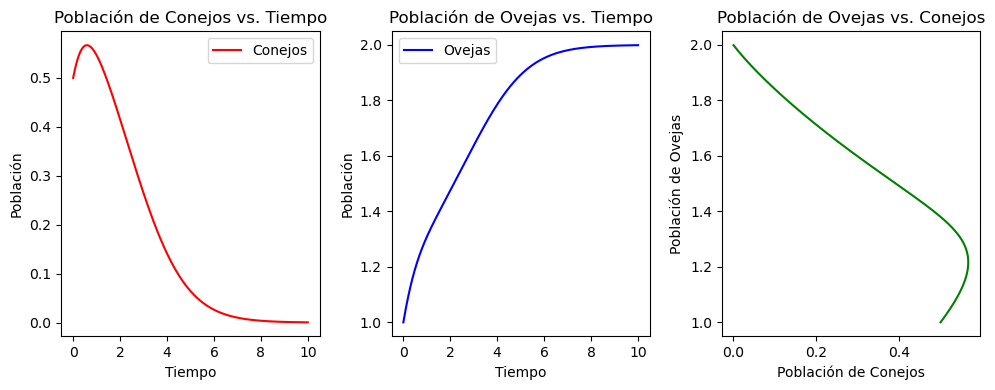

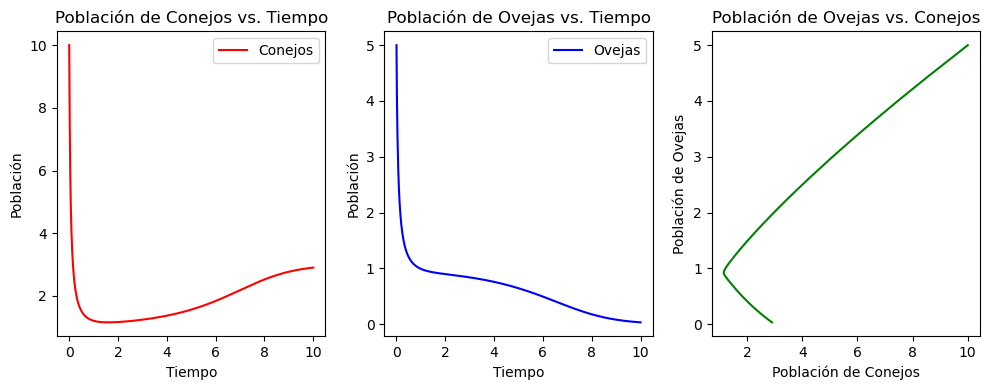

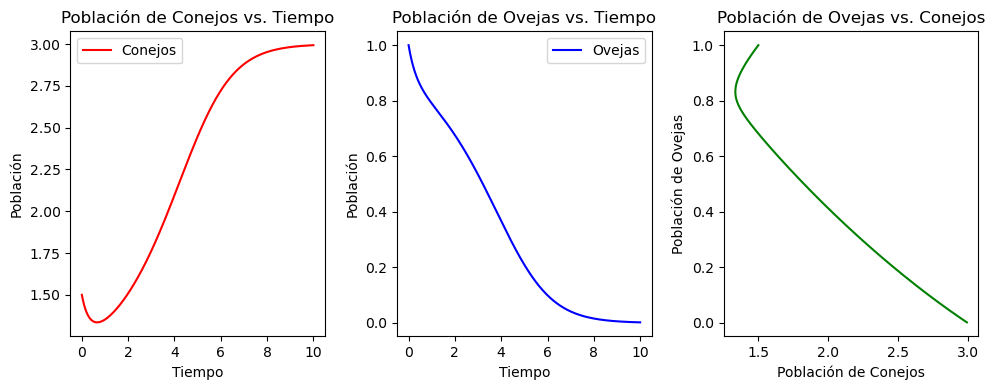

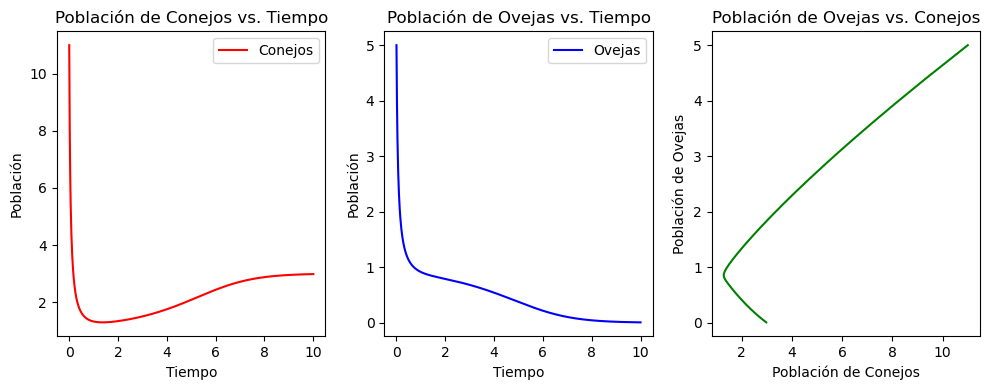

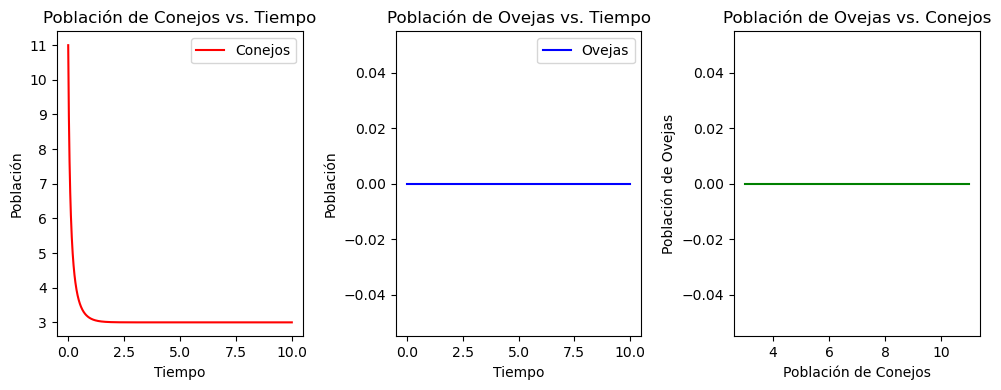

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir la ecuación diferencial del sistema
def modelo(x, t):
    x1, x2 = x
    dx1dt = x1 * (3 - x1 - 2 * x2)
    dx2dt = x2 * (2 - x2 - x1)
    return [dx1dt, dx2dt]

# Condiciones iniciales
x0_list = [[0.5, 1], [10, 5], [1.5, 1], [11, 5], [11, 0]]

# Simular y graficar para cada conjunto de condiciones iniciales
for x0 in x0_list:
    t = np.linspace(0, 10, 1000)  # Intervalo de tiempo
    x_sol = odeint(modelo, x0, t)  # Resolver el sistema

    # Gráficas
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.plot(t, x_sol[:, 0], 'r', label='Conejos')
    plt.xlabel('Tiempo')
    plt.ylabel('Población')
    plt.title('Población de Conejos vs. Tiempo')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(t, x_sol[:, 1], 'b', label='Ovejas')
    plt.xlabel('Tiempo')
    plt.ylabel('Población')
    plt.title('Población de Ovejas vs. Tiempo')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(x_sol[:, 0], x_sol[:, 1], 'g')
    plt.xlabel('Población de Conejos')
    plt.ylabel('Población de Ovejas')
    plt.title('Población de Ovejas vs. Conejos')

    plt.tight_layout()
    plt.show()


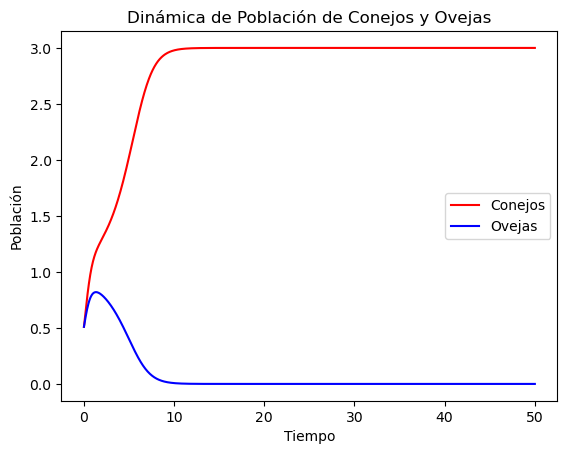

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir la ecuación diferencial del sistema
def modelo(x, t):
    x1, x2 = x
    dx1dt = x1 * (3 - x1 - 2 * x2)
    dx2dt = x2 * (2 - x2 - x1)
    return [dx1dt, dx2dt]

# Condiciones iniciales
x0 = [0.51, 0.51]  # Cambiar estas condiciones para analizar diferentes escenarios iniciales

# Intervalo de tiempo
t = np.linspace(0, 50, 1000)

# Resolver el sistema de ecuaciones
x_sol = odeint(modelo, x0, t)

# Graficar
plt.plot(t, x_sol[:, 0], 'r', label='Conejos')
plt.plot(t, x_sol[:, 1], 'b', label='Ovejas')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Dinámica de Población de Conejos y Ovejas')
plt.legend()
plt.show()


**Conclusión:**


Referencia:
- Strogatz, Steven. *NONLINEAR DYNAMICS AND CHAOS*, ISBN: 9780813349107, (eBook disponible en biblioteca).

## Ejemplo 2

### Primer punto. 
Resolver el siguiente sistema:

\begin{align}
\frac{dx}{dt} &= v \\
\frac{dv}{dt} &= -0.7 (\frac{dx}{dt})^2 \text{sign}{(\frac{dx}{dt})} - 100 \sin{(x)},
\end{align}


$$ x(0) = \frac{\pi}{3}$$
$$ v(0) = 0$$

In [13]:
def modelo(x, v):
    x1, x2 = x
    dxdt = v
    dvdt = (-0.7*(dxdt)**2)(np.sign(dxdt))-100*np.sin(x)
    x_0 = np.pi / 3
    v_0 = 0
    return [dxdt, dvdt]


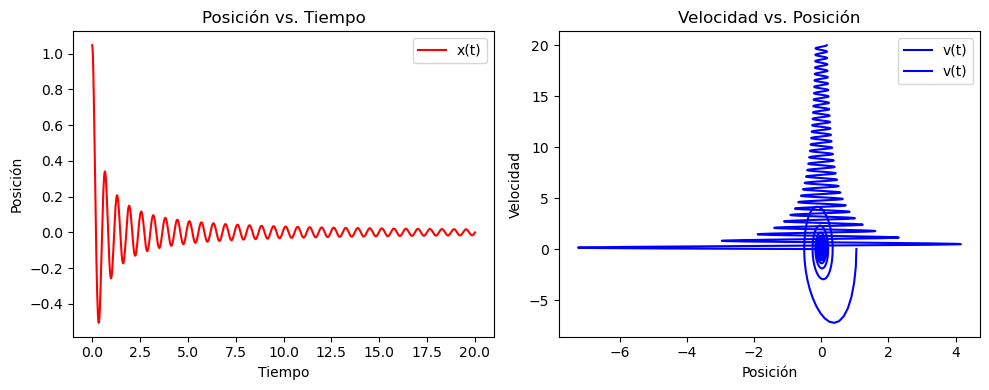

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir las ecuaciones del sistema
def sistema(y, t):
    x, v = y
    dxdt = v
    dvdt = -0.7 * v**2 * np.sign(v) - 100 * np.sin(x)
    return [dxdt, dvdt]

# Condiciones iniciales
x0 = np.pi / 3  # x(0)
v0 = 0  # v(0)
y0 = [x0, v0]  # Lista de condiciones iniciales

# Intervalo de tiempo
t = np.linspace(0, 20, 1000)

# Resolver el sistema de ecuaciones
sol = odeint(sistema, y0, t)

# Extraer las soluciones para x y v
x_sol = sol[:, 0]
v_sol = sol[:, 1]

# Graficar las soluciones
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(t, x_sol, 'r', label='x(t)')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.title('Posición vs. Tiempo')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(v_sol, t, 'b', label='v(t)')
plt.xlabel('Velocidad')
plt.ylabel('Tiempo')
plt.title('Tiempo vs. Velocidad')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_sol, v_sol, 'b', label='v(t)')
plt.xlabel('Posición')
plt.ylabel('Velocidad')
plt.title('Velocidad vs. Posición')
plt.legend()

plt.tight_layout()
plt.show()


### Segundo punto.
1. Graficar $x$ vs $t$.

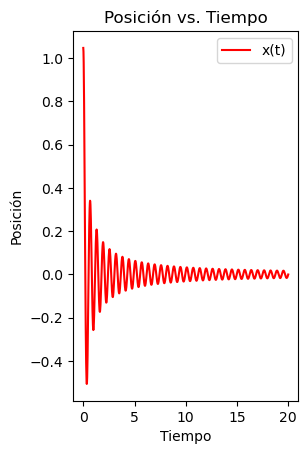

In [19]:
plt.subplot(1, 2, 1)
plt.plot(t, x_sol, 'r', label='x(t)')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.title('Posición vs. Tiempo')
plt.legend()

2. Graficar $t$ vs $v$.

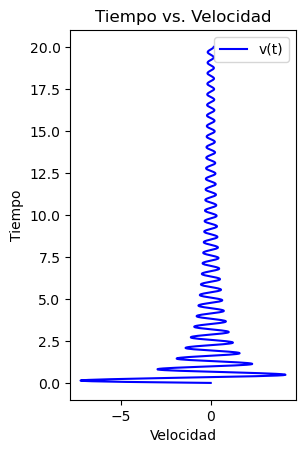

In [18]:
plt.subplot(1, 2, 2)
plt.plot(v_sol, t, 'b', label='v(t)')
plt.xlabel('Velocidad')
plt.ylabel('Tiempo')
plt.title('Tiempo vs. Velocidad')
plt.legend()

3. Graficar $x$ vs $v$.

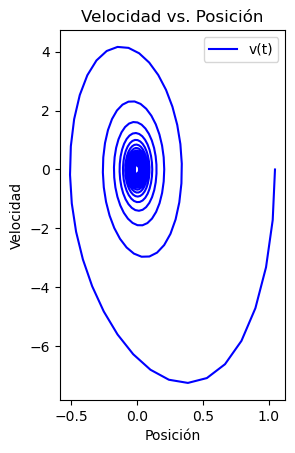

In [20]:
plt.subplot(1, 2, 2)
plt.plot(x_sol, v_sol, 'b', label='v(t)')
plt.xlabel('Posición')
plt.ylabel('Velocidad')
plt.title('Velocidad vs. Posición')
plt.legend()

## Ejemplo 3

¿Qué es una ecuación diferencial?

¿Qué es la solución de una ecuación diferencial?

¿Qué es una condición inicial? ¿Por qué se necesita para poder resolver numéricamente una ecuación diferencial de primer orden?

Si tuviera un sistema de 3 ecuaciones diferenciales con 3 variables diferentes, ¿cuántas condiciones iniciales se necesitan? ¿Por qué?

¿Cuál es la diferencia entre los siguientes tipos de errores?
- Norma del error
- Error cuadrático medio
- Integral del error cuadrático

In [21]:
from sympy import *
t = Symbol('t')
s = Symbol('s')

#expr = sin(7*t)
#transformada1 = laplace_transform(expr,t,s)
#print (transformada1)

In [31]:
def Laplace(t,s):
    t = Symbol('t')
    s = Symbol('s')
    
    expr1 = t**(-1/2)
    transformada1 = laplace_transform(expr1,t,s)
print (transformada1)


(7/(s**2 + 49), 0, True)
